The 'visible' parameter is working.


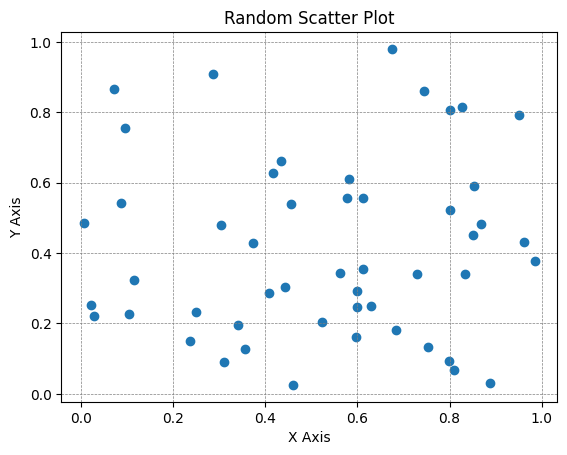

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)  # Create a scatter plot
plt.title('Random Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Try using 'visible' parameter with plt.grid
try:
    plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)
    print("The 'visible' parameter is working.")
except TypeError:
    print("The 'visible' parameter is not valid for plt.grid in this version of matplotlib.")

plt.show()


The 'visible' parameter is working.


/var/folders/48/l9nskc214ylb8mmx6d777vc4j2d6q6/T/ipykernel_71771/2488063461.py:15: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(visible=False, color='gray', linestyle='--', linewidth=0.5)


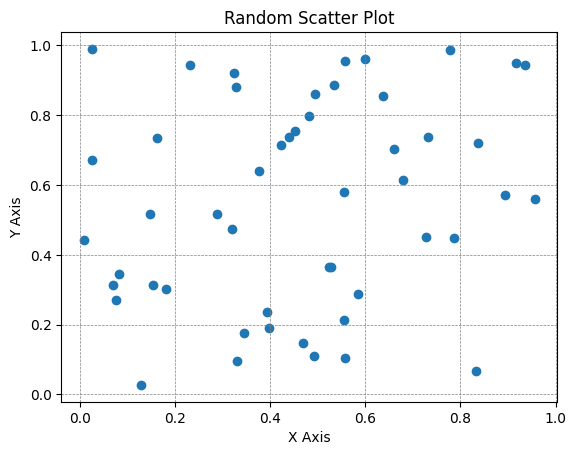

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)  # Create a scatter plot
plt.title('Random Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Try using 'visible' parameter with plt.grid
try:
    plt.grid(visible=False, color='gray', linestyle='--', linewidth=0.5)
    print("The 'visible' parameter is working.")
except TypeError:
    print("The 'visible' parameter is not valid for plt.grid in this version of matplotlib.")

plt.show()

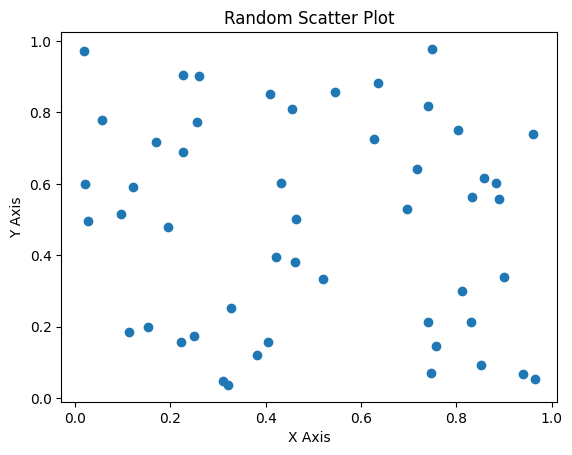

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x, y)  # Create a scatter plot
plt.title('Random Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Toggle grid visibility
show_grid = False  # Set to True to show gridlines, False to hide
if show_grid:
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
else:
    plt.grid(False)

plt.show()


In [13]:
# %%capture
# !pip install dcurves=='1.0.6.5'

In [16]:
dcurves.__version__


'1.0.7.0'

In [17]:
import dcurves

In [18]:
df_bin = dcurves.load_test_data.load_binary_df()


In [22]:
df_bin

,patientid,cancer,dead,risk_group,age,famhistory,marker,cancerpredmarker
0,1,False,0,low,64.03445,0,0.776309,0.037201
1,2,False,0,high,78.46741,0,0.267086,0.578907
2,3,False,0,low,64.14617,0,0.169621,0.021551
3,4,False,0,low,58.53482,0,0.023996,0.003910
4,5,False,0,low,63.99250,0,0.070910,0.018790
...,...,...,...,...,...,...,...,...
745,746,False,0,intermediate,66.09628,0,0.654782,0.057813
746,747,True,0,intermediate,65.75370,1,1.030259,0.160424
747,748,False,0,intermediate,70.28287,0,0.151616,0.108838
748,749,False,1,low,61.32673,0,0.624602,0.015285


In [45]:
df_dca = dcurves.dca(data=df_bin, outcome='cancer', modelnames = ['famhistory'])

In [46]:
df_dca

,model,threshold,n,prevalence,harm,test_pos_rate,tp_rate,fp_rate,net_benefit,net_intervention_avoided
0,famhistory,0.00,750,0.14,0.0,0.153333,0.032,0.121333,0.032000,-inf
1,famhistory,0.01,750,0.14,0.0,0.153333,0.032,0.121333,0.030774,-9.953333
2,famhistory,0.02,750,0.14,0.0,0.153333,0.032,0.121333,0.029524,-4.553333
3,famhistory,0.03,750,0.14,0.0,0.153333,0.032,0.121333,0.028247,-2.753333
4,famhistory,0.04,750,0.14,0.0,0.153333,0.032,0.121333,0.026944,-1.853333
...,...,...,...,...,...,...,...,...,...,...
295,none,0.95,750,0.14,0.0,0.000000,0.000,0.000000,0.000000,0.852632
296,none,0.96,750,0.14,0.0,0.000000,0.000,0.000000,0.000000,0.854167
297,none,0.97,750,0.14,0.0,0.000000,0.000,0.000000,0.000000,0.855670
298,none,0.98,750,0.14,0.0,0.000000,0.000,0.000000,0.000000,0.857143


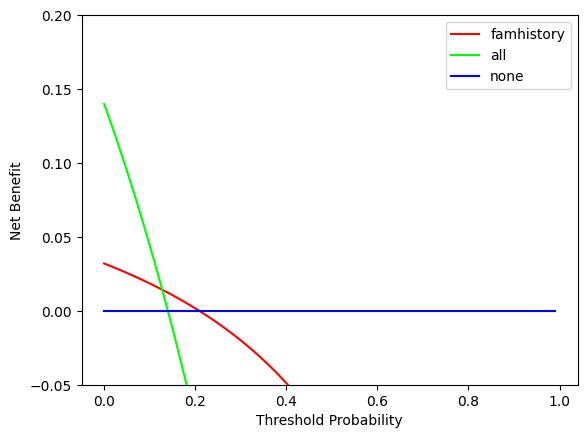

In [47]:
dcurves.plot_graphs(plot_df=df_dca, show_grid=False,y_limits=[-0.05, 0.2])

In [17]:
help(dcurves.plot_graphs)

Help on function plot_graphs in module dcurves.plot_graphs:

plot_graphs(plot_df: pandas.core.frame.DataFrame, graph_type: str = 'net_benefit', y_limits: Iterable = (-0.05, 1), color_names: Optional[Iterable] = None, show_grid: bool = True) -> None
    Plot either net benefit or interventions avoided per threshold.
    
    Parameters
    ----------
    plot_df : pd.DataFrame
        Data containing threshold values, model columns of net benefit/intervention
        scores to be plotted
    graph_type : str
        Type of plot (either 'net_benefit' or 'net_intervention_avoided')
    y_limits : Iterable[Lower Bound, Upper Bound]
        2 floats, lower and upper bounds for y-axis
    color_names : Iterable[str]
        Colors to render each model (if n models supplied, then need n+2 colors,
        since 'all' and 'none' models will be included by default
    
    
    Returns
    -------
    None

